In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LSTM, concatenate, Dense, GRU, Attention, MultiHeadAttention, LayerNormalization, TimeDistributed, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#data 불러오기 
import pickle

total_data_path = '/content/total_data_dips.pkl'
with open(total_data_path, 'rb') as f:
    total_data_dips = pickle.load(f)

outputvec_path = '/content/outputvec_dips.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_dips = pickle.load(f)

#데이터 표현 바꿔보기 
data_path = '/content/data_changed.pkl'
with open(data_path, 'rb') as f:
    data_changed = pickle.load(f)



total_data_dips=np.array(total_data_dips)
outputvec_dips=np.array(outputvec_dips)
data_changed=np.array(data_changed)


In [4]:
print(total_data_dips.shape,outputvec_dips.shape,data_changed.shape)

(422, 16, 240) (422, 4) (422, 5, 16, 48)


In [5]:
#test set

text_x = '/content/test_x.pkl'
with open(text_x, 'rb') as f:
    text_x = pickle.load(f)

# outputvec_dips.pkl 파일 경로
testoutput_dips = '/content/testoutput_dips.pkl'
with open(testoutput_dips, 'rb') as f:
    testoutput_dips = pickle.load(f)

test_data_240 = '/content/test_data_240.pkl'
with open(test_data_240, 'rb') as f:
    test_data_240 = pickle.load(f)


In [6]:
test_data_240 =np.array(test_data_240)
test_data =np.array(text_x)
test_labels=np.array(testoutput_dips)

In [7]:
data=np.array(total_data_dips)

In [8]:
data[0]

array([[1056,  474, 1058, ...,  950, 1050,  923],
       [1062,  472, 1055, ...,  943, 1046,  935],
       [1056,  428, 1049, ...,  949, 1048,  940],
       ...,
       [1104,  573, 1099, ...,  933, 1037,  926],
       [1054,  421, 1044, ...,  945, 1045,  940],
       [1021,  466, 1016, ...,  961, 1036,  946]])

In [9]:
outputvec_dips[0]

array([1, 1, 1, 1], dtype=int32)

In [10]:
y_label=outputvec_dips

In [11]:
data.shape

(422, 16, 240)

In [12]:
test_data_240.shape

(144, 16, 240)

In [ ]:
def f1_score(y_true, y_pred):
    y_true = K.cast(y_true, tf.float32)
    y_pred = K.round(y_pred)
    
    tp = K.sum(y_true * y_pred)
    fp = K.sum(K.clip(y_pred - y_true, 0, 1))
    fn = K.sum(K.clip(y_true - y_pred, 0, 1))
    
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    
    return f1

Epoch 1/30
11/11 [==============================] - 3s 25ms/step - loss: 214.6340 - accuracy: 0.1780 - val_loss: 0.6931 - val_accuracy: 0.2471
Epoch 2/30
11/11 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.2522 - val_loss: 0.6932 - val_accuracy: 0.2471
Epoch 3/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.2522 - val_loss: 0.6932 - val_accuracy: 0.2471
Epoch 4/30
11/11 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.2522 - val_loss: 0.6932 - val_accuracy: 0.2471
Epoch 5/30
11/11 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.2522 - val_loss: 0.6932 - val_accuracy: 0.2471
Epoch 6/30
11/11 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.2522 - val_loss: 0.6932 - val_accuracy: 0.2471
Epoch 7/30
11/11 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.2522 - val_loss: 0.6932 - val_accuracy: 0.2471
Epoch 8/30
1

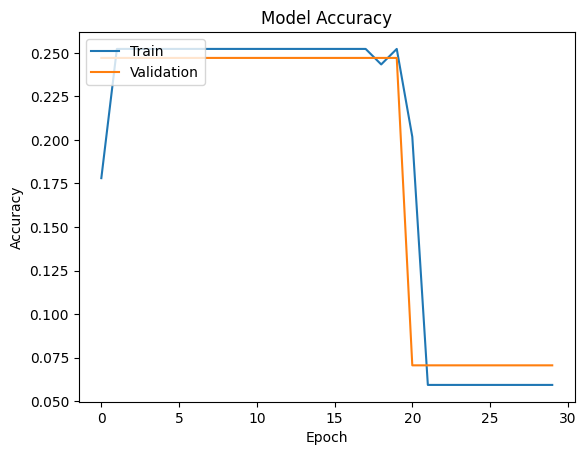

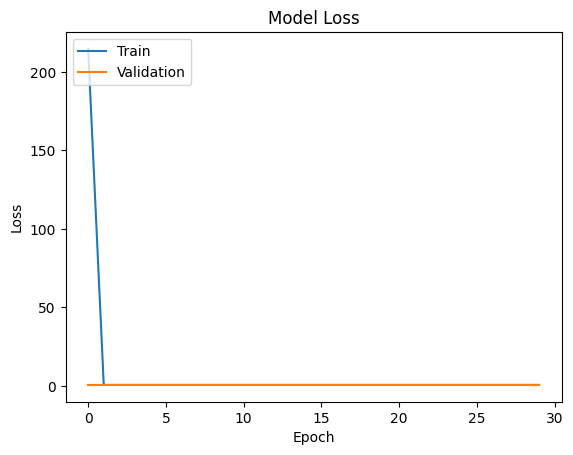

In [ ]:

# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 4
# 데이터 개수
num_samples = 422

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(2048, activation='relu'))  # Dense 레이어
model.add(tf.keras.layers.Dense(512, activation='relu'))  # Dense 레이어
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(tf.keras.layers.Dense(16, activation='relu'))  # Dense 레이어
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, outputvec_dips, epochs=30, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/30
11/11 [==============================] - 2s 22ms/step - loss: 0.7211 - accuracy: 0.3027 - val_loss: 0.7014 - val_accuracy: 0.1294
Epoch 2/30
11/11 [==============================] - 0s 8ms/step - loss: 0.7035 - accuracy: 0.3442 - val_loss: 0.6991 - val_accuracy: 0.5529
Epoch 3/30
11/11 [==============================] - 0s 7ms/step - loss: 0.6983 - accuracy: 0.3412 - val_loss: 0.6943 - val_accuracy: 0.1294
Epoch 4/30
11/11 [==============================] - 0s 8ms/step - loss: 0.7002 - accuracy: 0.2908 - val_loss: 0.6967 - val_accuracy: 0.2471
Epoch 5/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6962 - accuracy: 0.2226 - val_loss: 0.6950 - val_accuracy: 0.1294
Epoch 6/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6957 - accuracy: 0.2967 - val_loss: 0.6945 - val_accuracy: 0.5529
Epoch 7/30
11/11 [==============================] - 0s 8ms/step - loss: 0.6939 - accuracy: 0.3858 - val_loss: 0.6941 - val_accuracy: 0.2471
Epoch 8/30
11/11 [=

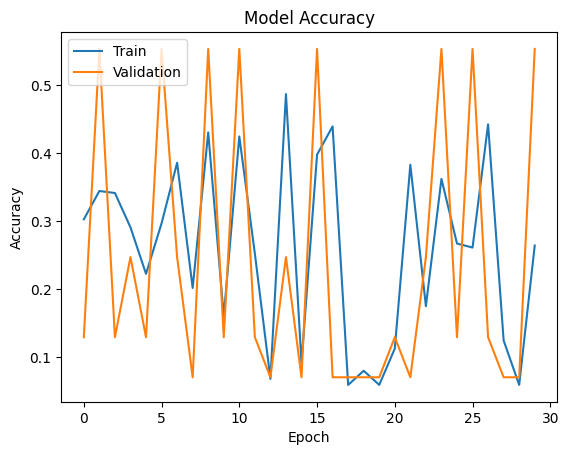

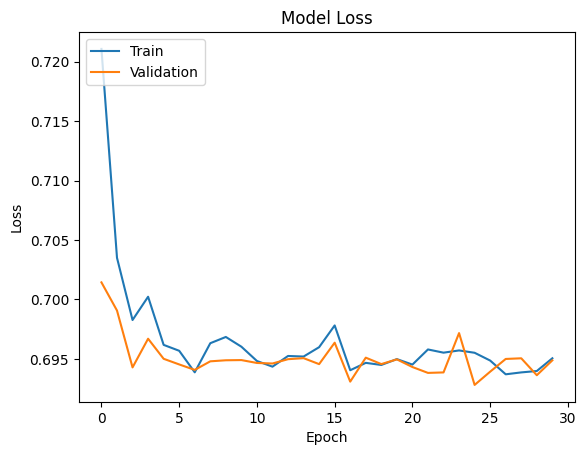

In [ ]:

# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 4
# 데이터 개수
num_samples = 422

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(128, activation='tanh'))  # Dense 레이어
model.add(tf.keras.layers.Dense(64, activation='tanh'))  # Dense 레이어
model.add(tf.keras.layers.Dense(32, activation='tanh'))  # Dense 레이어

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, outputvec_dips, epochs=30, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5625
Test Loss: 0.6939002871513367
Test Accuracy: 0.5625


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5625
Test Loss: 0.6934293508529663
Test Accuracy: 0.5625


In [ ]:
model=123

Epoch 1/100
43/43 [==============================] - 4s 16ms/step - loss: 0.7094 - accuracy: 0.1246 - val_loss: 0.7033 - val_accuracy: 0.1294
Epoch 2/100
43/43 [==============================] - 0s 7ms/step - loss: 0.6992 - accuracy: 0.1246 - val_loss: 0.6978 - val_accuracy: 0.1294
Epoch 3/100
43/43 [==============================] - 0s 7ms/step - loss: 0.6957 - accuracy: 0.1246 - val_loss: 0.6953 - val_accuracy: 0.1294
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.1246 - val_loss: 0.6949 - val_accuracy: 0.1294
Epoch 5/100
43/43 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.1246 - val_loss: 0.6942 - val_accuracy: 0.1294
Epoch 6/100
43/43 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.1810 - val_loss: 0.6945 - val_accuracy: 0.1294
Epoch 7/100
43/43 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.1246 - val_loss: 0.6939 - val_accuracy: 0.1294
Epoch 8/100


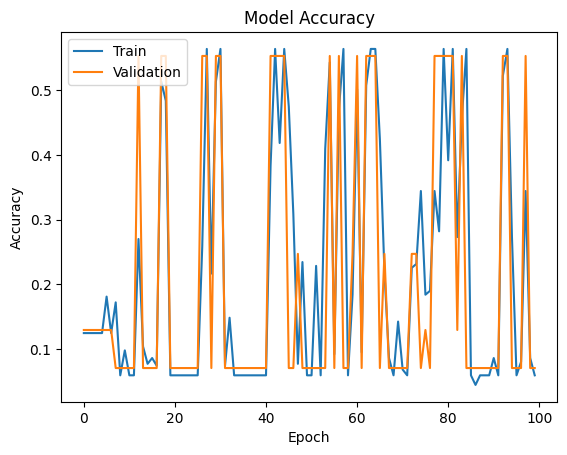

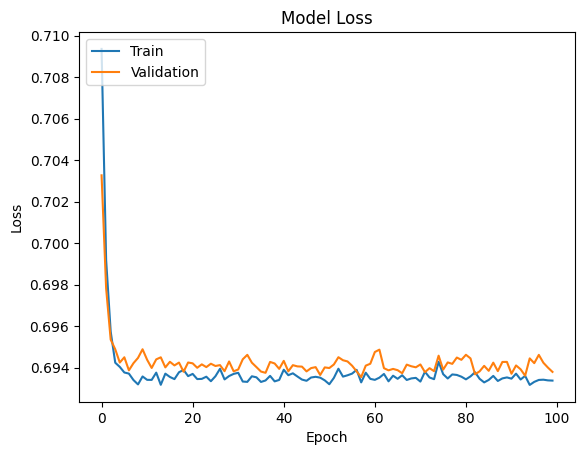

In [ ]:

import tensorflow as tf

# 입력 데이터 shape
input_shape = (16,240)  
# 출력 데이터 shape
output_shape = 4

# 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(4, input_shape=input_shape, return_sequences=False))
model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))
# 모델 컴파일

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력

history = model.fit(total_data_dips, outputvec_dips, epochs=100, batch_size=8, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.0625
Test Loss: 0.6933401823043823
Test Accuracy: 0.0625


Epoch 1/50
11/11 [==============================] - 4s 52ms/step - loss: 0.6989 - accuracy: 0.1395 - val_loss: 0.6971 - val_accuracy: 0.2471
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6978 - accuracy: 0.2522 - val_loss: 0.6948 - val_accuracy: 0.2471
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.6965 - accuracy: 0.1365 - val_loss: 0.6965 - val_accuracy: 0.1294
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6936 - val_accuracy: 0.2471
Epoch 5/50
11/11 [==============================] - 0s 9ms/step - loss: 0.6946 - accuracy: 0.1691 - val_loss: 0.6930 - val_accuracy: 0.0706
Epoch 6/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6948 - accuracy: 0.0979 - val_loss: 0.6951 - val_accuracy: 0.2471
Epoch 7/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6936 - accuracy: 0.4392 - val_loss: 0.6942 - val_accuracy: 0.5529
Epoch 8/50
11/1

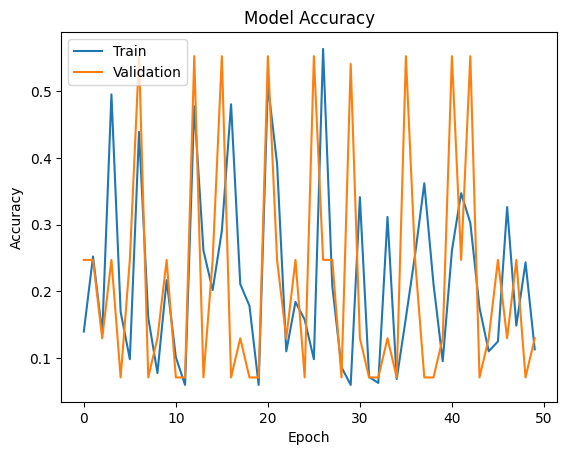

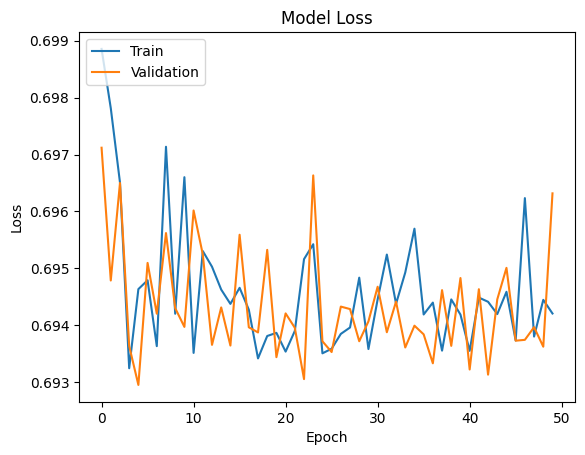

In [ ]:
import tensorflow as tf

# 입력 데이터 shape
input_shape = (16,240)  
# 출력 데이터 shape
output_shape = 4

# 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(16, input_shape=input_shape, return_sequences=False))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))
# 모델 컴파일

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(total_data_dips, outputvec_dips, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.1319
Test Loss: 0.6943579316139221
Test Accuracy: 0.1319444477558136


Epoch 1/50
11/11 [==============================] - 4s 31ms/step - loss: 385.7091 - accuracy: 0.1691 - val_loss: 72.1652 - val_accuracy: 0.1294
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 43.6895 - accuracy: 0.1632 - val_loss: 24.5220 - val_accuracy: 0.1294
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 21.4926 - accuracy: 0.1513 - val_loss: 18.0874 - val_accuracy: 0.2941
Epoch 4/50
11/11 [==============================] - 0s 13ms/step - loss: 18.9419 - accuracy: 0.1751 - val_loss: 27.5689 - val_accuracy: 0.5529
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 17.9960 - accuracy: 0.2700 - val_loss: 8.6741 - val_accuracy: 0.1294
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 10.9683 - accuracy: 0.2552 - val_loss: 6.3269 - val_accuracy: 0.1294
Epoch 7/50
11/11 [==============================] - 0s 11ms/step - loss: 8.8954 - accuracy: 0.2611 - val_loss: 8.0210 - val_accuracy: 0.5529
Ep

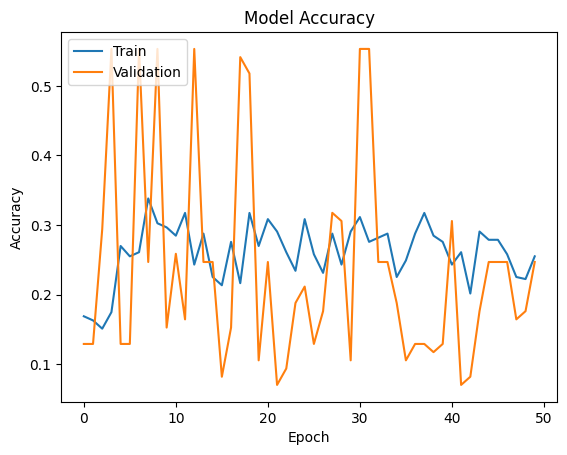

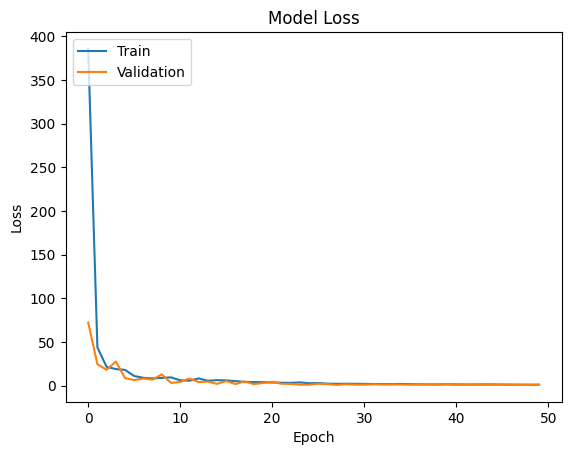

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Conv1D

# 입력 데이터의 크기
num_frames = 16
num_coords = 240
input_shape = (num_frames, num_coords)

# 출력 벡터의 크기
output_shape = 4

# 트랜스포머 모델 정의
def create_transformer_model(input_shape, output_shape):
    inputs = Input(shape=input_shape)

    # 멀티헤드 어텐션
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=64, dropout=0.1
    )(inputs, inputs)
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    attention_output = Dropout(0.1)(attention_output + inputs)

    # 피드포워드 네트워크
    feed_forward_output = Conv1D(filters=512, kernel_size=2, strides=2,  activation="relu")(attention_output)
    feed_forward_output = Conv1D(filters=256, kernel_size=2, strides=2, activation="relu")(feed_forward_output)


    model = Model(inputs=inputs, outputs=feed_forward_output)
    return model

# 모델 생성
model = create_transformer_model(input_shape, output_shape)

# GlobalAveragePooling1D 레이어 추가
global_average_output = GlobalAveragePooling1D()(model.output)

# 출력 레이어 추가
output = Dense(output_shape, activation='sigmoid')(global_average_output)

# 모델 재구성
model = Model(inputs=model.input, outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, outputvec_dips, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6868 - accuracy: 0.0764
Test Loss: 0.6868391036987305
Test Accuracy: 0.0763888880610466


In [ ]:
data_changed.shape

(422, 5, 16, 48)

In [ ]:
y_label.shape

(422, 4)

In [ ]:
model=123

In [ ]:
from tensorflow.keras.layers import Input, GRU, concatenate, Dense,LSTM
from tensorflow.keras.models import Model

input_ = Input(shape=(5,16, 48))

x1 = LSTM(16, return_sequences=False)(input_[:, 0, :, :])
x1 = Model(inputs=input_, outputs=x1)

x2 = LSTM(16, return_sequences=False)(input_[:, 1, :, :])
x2 = Model(inputs=input_, outputs=x2)

x3 = LSTM(16, return_sequences=False)(input_[:, 2, :, :])
x3 = Model(inputs=input_, outputs=x3)

x4 = LSTM(16, return_sequences=False)(input_[:, 3, :, :])
x4 = Model(inputs=input_, outputs=x4)

x5 = LSTM(16, return_sequences=False)(input_[:, 4, :, :])
x5 = Model(inputs=input_, outputs=x5)

combined = concatenate([x1.output, x2.output, x3.output, x4.output, x5.output])
z = Dense(16, activation="sigmoid")(combined)
z = Dense(4, activation="sigmoid")(z)

model = Model(inputs=input_, outputs=z)



In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(data_changed, outputvec_dips, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
11/11 [==============================] - 11s 238ms/step - loss: 0.6988 - accuracy: 0.2522 - val_loss: 0.6914 - val_accuracy: 0.2471
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6935 - accuracy: 0.3620 - val_loss: 0.6928 - val_accuracy: 0.2706
Epoch 3/50
11/11 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.2700 - val_loss: 0.6942 - val_accuracy: 0.5294
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.1958 - val_loss: 0.6942 - val_accuracy: 0.0706
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.0593 - val_loss: 0.6936 - val_accuracy: 0.0706
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.0593 - val_loss: 0.6938 - val_accuracy: 0.0706
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 0.6933 - accuracy: 0.3205 - val_loss: 0.6935 - val_accuracy: 0.5176
Epoch 8/50


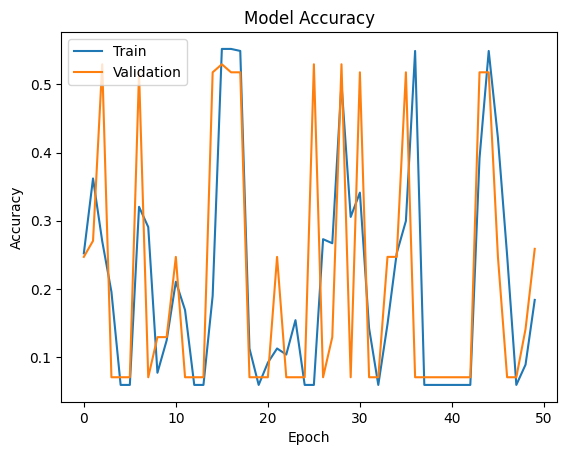

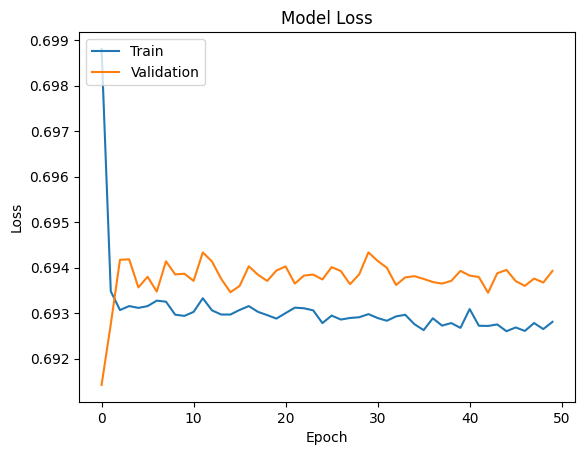

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.2500
Test Loss: 0.6920265555381775
Test Accuracy: 0.25


In [ ]:

def thresholded_sigmoid(x, threshold=0.5):
    return K.cast(K.greater(x, threshold), K.floatx())

Epoch 1/50
11/11 [==============================] - 15s 164ms/step - loss: 0.7641 - accuracy: 0.1246 - val_loss: 0.7593 - val_accuracy: 0.1294
Epoch 2/50
11/11 [==============================] - 0s 22ms/step - loss: 0.7377 - accuracy: 0.1246 - val_loss: 0.7364 - val_accuracy: 0.1294
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.7207 - accuracy: 0.1246 - val_loss: 0.7222 - val_accuracy: 0.1294
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 0.7100 - accuracy: 0.1246 - val_loss: 0.7131 - val_accuracy: 0.1294
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.7045 - accuracy: 0.1246 - val_loss: 0.7062 - val_accuracy: 0.1294
Epoch 6/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6996 - accuracy: 0.1246 - val_loss: 0.7025 - val_accuracy: 0.1294
Epoch 7/50
11/11 [==============================] - 0s 20ms/step - loss: 0.6973 - accuracy: 0.1246 - val_loss: 0.6997 - val_accuracy: 0.1294
Epoch 8/50


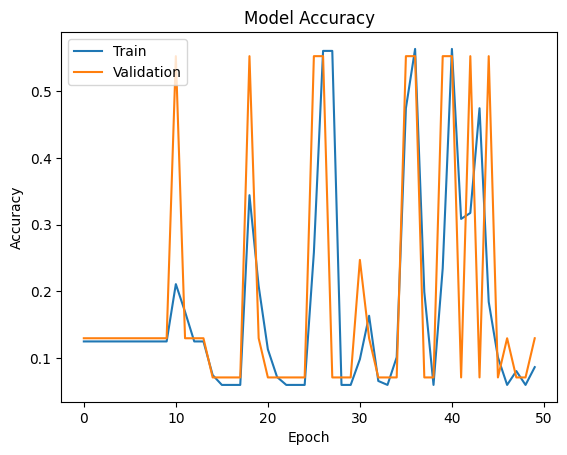

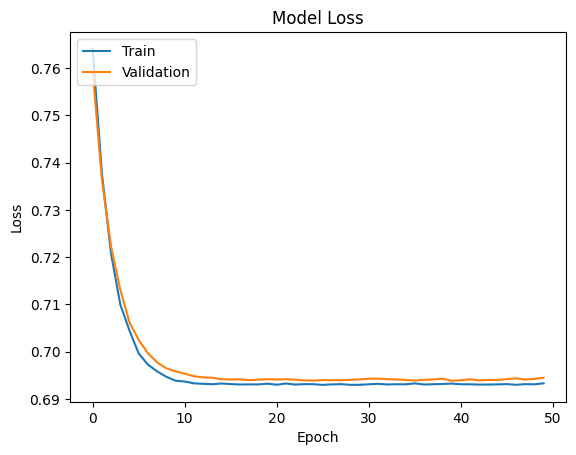

In [ ]:
from tensorflow.keras.layers import Input, LSTM, concatenate, Dense,GRU
from tensorflow.keras.models import Model

input_ = Input(shape=(5, 16, 48))

x1 = GRU(4, return_sequences=False)(input_[:, 0, :, :])
x1 = Dense(16, activation="sigmoid")(x1)
x1 = Dense(4, activation="sigmoid")(x1)

x2 = GRU(4, return_sequences=False)(input_[:, 1, :, :])
x2 = Dense(16, activation="sigmoid")(x2)
x2 = Dense(4, activation="relu")(x2)

x3 = GRU(4, return_sequences=False)(input_[:, 2, :, :])
x3 = Dense(16, activation="sigmoid")(x3)
x3 = Dense(4, activation="relu")(x3)

x4 = GRU(4, return_sequences=False)(input_[:, 3, :, :])
x4 = Dense(16, activation="sigmoid")(x4)
x4 = Dense(4, activation="relu")(x4)

x5 = GRU(4, return_sequences=False)(input_[:, 4, :, :])
x5 = Dense(16, activation="sigmoid")(x5)
x5 = Dense(4, activation="relu")(x5)

combined = concatenate([x1, x2, x3, x4, x5])
z = Dense(4, activation="sigmoid")(combined)

model = Model(inputs=input_, outputs=z)
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(data_changed, y_label, batch_size=32, epochs=50, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.1250
Test Loss: 0.6935666799545288
Test Accuracy: 0.125


In [ ]:
model=123

In [ ]:

input_ = Input(shape=(5, 16, 48))
attention = MultiHeadAttention(num_heads=8, key_dim=16)

x1 = attention(input_[:, 0, :, :], input_[:, 0, :, :])
x1 = LayerNormalization(epsilon=1e-6)(x1)
x1 = TimeDistributed(Dense(4, activation=relu))(x1)
x1 = LayerNormalization(epsilon=1e-6)(x1)
x1 = Flatten()(x1)
x1 = Dense(16, activation=relu)(x1)
x1 = Dropout(0.2)(x1)
output = Dense(4, activation="sigmoid")(x1)
x1 = Model(inputs=input_, outputs=output)


x2 = attention(input_[:, 1, :, :], input_[:, 1, :, :])
x2 = LayerNormalization(epsilon=1e-6)(x2)
x2 = TimeDistributed(Dense(4, activation=relu))(x2)
x2 = LayerNormalization(epsilon=1e-6)(x2)
x2 = Flatten()(x2)
x2 = Dense(16, activation=relu)(x2)
x2 = Dropout(0.2)(x2)
output = Dense(4, activation="sigmoid")(x2)
x2 = Model(inputs=input_, outputs=output)

x3 = attention(input_[:, 2, :, :], input_[:, 2, :, :])
x3 = LayerNormalization(epsilon=1e-6)(x3)
x3 = TimeDistributed(Dense(4, activation=relu))(x3)
x3 = LayerNormalization(epsilon=1e-6)(x3)
x3 = Flatten()(x3)
x3 = Dense(16, activation=relu)(x3)
x3 = Dropout(0.2)(x3)
output = Dense(4, activation="sigmoid")(x3)
x3 = Model(inputs=input_, outputs=output)
x4 = attention(input_[:, 3, :, :], input_[:, 3, :, :])
x4 = LayerNormalization(epsilon=1e-6)(x4)
x4 = TimeDistributed(Dense(4, activation=relu))(x4)
x4 = LayerNormalization(epsilon=1e-6)(x4)
x4 = Flatten()(x4)
x4 = Dense(16, activation=relu)(x4)
x4 = Dropout(0.2)(x4)
output = Dense(4, activation="sigmoid")(x4)
x4 = Model(inputs=input_, outputs=output)



x5 = attention(input_[:, 4, :, :], input_[:, 4, :, :])
x5 = LayerNormalization(epsilon=1e-6)(x5)
x5 = TimeDistributed(Dense(4, activation=relu))(x5)
x5 = LayerNormalization(epsilon=1e-6)(x5)
x5 = Flatten()(x5)
x5 = Dense(16, activation=relu)(x5)
x5 = Dropout(0.2)(x5)
output = Dense(4, activation="sigmoid")(x5)
x5 = Model(inputs=input_, outputs=output)

combined = concatenate([x1.output, x2.output, x3.output, x4.output, x5.output])
z = Dense(4, activation="sigmoid")(combined)

model = Model(inputs=input_, outputs=z)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history =model.fit(data_changed, y_label, batch_size=32, epochs=50, validation_split=0.2)


Epoch 1/50
11/11 [==============================] - 13s 78ms/step - loss: 0.7385 - accuracy: 0.2522 - val_loss: 0.7041 - val_accuracy: 0.2471
Epoch 2/50
11/11 [==============================] - 0s 22ms/step - loss: 0.7044 - accuracy: 0.2463 - val_loss: 0.6950 - val_accuracy: 0.2471
Epoch 3/50
11/11 [==============================] - 0s 21ms/step - loss: 0.7029 - accuracy: 0.1276 - val_loss: 0.6953 - val_accuracy: 0.0706
Epoch 4/50
11/11 [==============================] - 0s 21ms/step - loss: 0.6942 - accuracy: 0.2463 - val_loss: 0.6948 - val_accuracy: 0.5529
Epoch 5/50
11/11 [==============================] - 0s 21ms/step - loss: 0.6967 - accuracy: 0.3353 - val_loss: 0.6949 - val_accuracy: 0.5529
Epoch 6/50
11/11 [==============================] - 0s 25ms/step - loss: 0.6961 - accuracy: 0.2819 - val_loss: 0.6951 - val_accuracy: 0.0706
Epoch 7/50
11/11 [==============================] - 0s 20ms/step - loss: 0.6960 - accuracy: 0.2047 - val_loss: 0.6941 - val_accuracy: 0.0706
Epoch 8/50
1

In [14]:
data_changed.shape

(422, 5, 16, 48)

In [18]:
view1=[]
view2=[]
view3=[]
view4=[]
view5=[]

In [19]:
for i in data_changed:
    view1.append(i[0])
    view2.append(i[1])
    view3.append(i[2])
    view4.append(i[3])
    view5.append(i[4])

view1=np.array(view1)
view2=np.array(view2)
view3=np.array(view3)
view4=np.array(view4)
view5=np.array(view5)


In [20]:
len(view1)

422

In [21]:
view1.shape

(422, 16, 48)

In [23]:
test_data .shape

(144, 5, 16, 48)

In [24]:
test1=[]
test2=[]
test3=[]
test4=[]
test5=[]

In [25]:

for i in test_data:
    test1.append(i[0])
    test2.append(i[1])
    test3.append(i[2])
    test4.append(i[3])
    test5.append(i[4])

test1=np.array(view1)
test2=np.array(view2)
test3=np.array(view3)
test4=np.array(view4)
test5=np.array(view5)


In [26]:
dataset=[test1,test2,test3,test4,test5]

In [32]:
import tensorflow as tf

# 입력 데이터 shape
input_shape = (16, 48)
# 출력 데이터 shape
output_shape = 4

models = []
for view_data in [view1, view2, view3, view4, view5]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(4, input_shape=input_shape, return_sequences=False))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(view_data, outputvec_dips, epochs=30, batch_size=16, validation_split=0.2)
    models.append(model)  # 모델 자체를 저장

    # 모델 저장
    model.save(f'model_{len(models)}.h5')


Epoch 1/30
22/22 [==============================] - 3s 29ms/step - loss: 0.7445 - accuracy: 0.5638 - val_loss: 0.7379 - val_accuracy: 0.5529
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7241 - accuracy: 0.5638 - val_loss: 0.7213 - val_accuracy: 0.5529
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7112 - accuracy: 0.5638 - val_loss: 0.7119 - val_accuracy: 0.5529
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7042 - accuracy: 0.5638 - val_loss: 0.7056 - val_accuracy: 0.5529
Epoch 5/30
22/22 [==============================] - 0s 9ms/step - loss: 0.6996 - accuracy: 0.5638 - val_loss: 0.7013 - val_accuracy: 0.5529
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 0.6970 - accuracy: 0.5638 - val_loss: 0.6990 - val_accuracy: 0.5529
Epoch 7/30
22/22 [==============================] - 0s 9ms/step - loss: 0.6956 - accuracy: 0.5638 - val_loss: 0.6978 - val_accuracy: 0.5529
Epoch 8/30
22/22 [=

In [33]:
model_files = ['model_1.h5', 'model_2.h5', 'model_3.h5', 'model_4.h5', 'model_5.h5']

loaded_models = []
for model_file in model_files:
    loaded_model = tf.keras.models.load_model(model_file)
    loaded_models.append(loaded_model)

In [35]:
import numpy as np

# Majority Vote 함수
def majority_vote(predictions):
    votes = np.round(predictions)  # 반올림하여 0 또는 1로 변환
    majority = np.mean(votes, axis=0)  # 열 단위로 평균 계산
    return np.round(majority)  # 다수결로 결정된 값을 반올림하여 0 또는 1로 변환

# 테스트 세트에 대한 예측 수행
test_predictions = []
for model,test_data in zip(loaded_models,dataset):
    prediction = model.predict(test_data)  # test_data: 테스트 세트 입력 데이터
    test_predictions.append(prediction)

# Majority Vote를 통한 예측
ensemble_prediction = majority_vote(test_predictions)



14/14 [==============================] - 0s 2ms/step


In [39]:
ensemble_prediction[:30]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

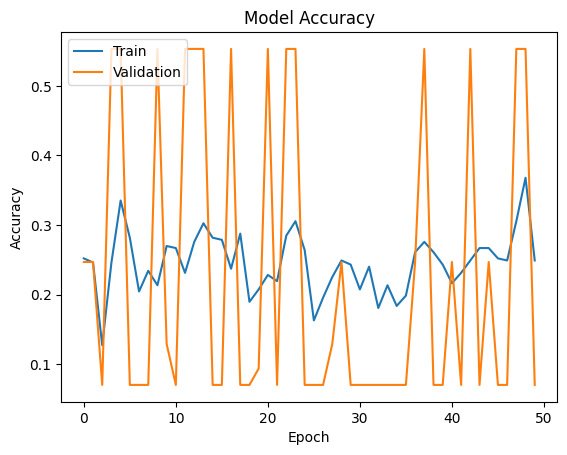

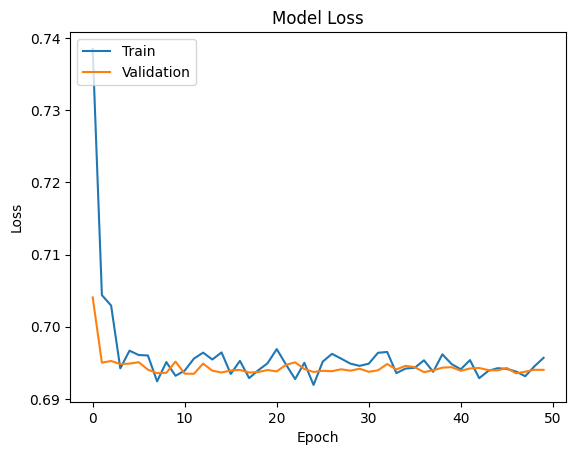

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.0625
Test Loss: 0.6934493780136108
Test Accuracy: 0.0625


In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
import math

from tensorflow.keras.layers import Input, GRU, concatenate, Dense
from tensorflow.keras.models import Model

threshold = 0.5

input_ = Input(shape=(5, 16, 48))

x1_input = input_[:, 0, :, :]
x1 = GRU(4, return_sequences=False)(x1_input)
x1 = Dense(4, activation="sigmoid")(x1)
x1_model = Model(inputs=x1_input, outputs=tf.where(x1 >= threshold, tf.ones_like(x1), tf.zeros_like(x1)))

x2_input = input_[:, 1, :, :]
x2 = GRU(4, return_sequences=False)(x2_input)
x2 = Dense(4, activation="sigmoid")(x2)
x2_model = Model(inputs=x2_input, outputs=tf.where(x2 >= threshold, tf.ones_like(x2), tf.zeros_like(x2)))

x3_input = input_[:, 2, :, :]
x3 = GRU(4, return_sequences=False)(x3_input)
x3 = Dense(4, activation="sigmoid")(x3)
x3_model = Model(inputs=x3_input, outputs=tf.where(x3 >= threshold, tf.ones_like(x3), tf.zeros_like(x3)))

x4_input = input_[:, 3, :, :]
x4 = GRU(4, return_sequences=False)(x4_input)
x4 = Dense(4, activation="sigmoid")(x4)
x4_model = Model(inputs=x4_input, outputs=tf.where(x4 >= threshold, tf.ones_like(x4), tf.zeros_like(x4)))

x5_input = input_[:, 4, :, :]
x5 = GRU(4, return_sequences=False)(x5_input)
x5 = Dense(4, activation="sigmoid")(x5)
x5_model = Model(inputs=x5_input, outputs=tf.where(x5 >= threshold, tf.ones_like(x5), tf.zeros_like(x5)))



# Apply majority vote
combined = concatenate([x1_model.output, x2_model.output, x3_model.output, x4_model.output, x5_model.output])
majority_vote = tf.reduce_mean(combined, axis=1) >= 0.5


model = Model(inputs=input_, outputs=z)



ValueError: ignored

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data_changed, y_lable, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100


11/11 [==============================] - 9s 158ms/step - loss: 0.7256 - accuracy: 0.1246 - val_loss: 0.7116 - val_accuracy: 0.1294
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7216 - accuracy: 0.1246 - val_loss: 0.7093 - val_accuracy: 0.1294
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.7189 - accuracy: 0.1246 - val_loss: 0.7074 - val_accuracy: 0.1294
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7164 - accuracy: 0.1246 - val_loss: 0.7056 - val_accuracy: 0.1294
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.7141 - accuracy: 0.1246 - val_loss: 0.7040 - val_accuracy: 0.1294
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7120 - accuracy: 0.1246 - val_loss: 0.7025 - val_accuracy: 0.1294
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7100 - accuracy: 0.1246 - val_loss: 0.7011 - val_accuracy: 0.1294
Epoch 8/100
11/11 [

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, GRU, concatenate, Dense
from tensorflow.keras.models import Model
from scipy.stats import mode

threshold = 0.5

input_ = Input(shape=(5, 16, 48))

x1 = GRU(4, return_sequences=False)(input_[:, 0, :, :])
x1 = Dense(4, activation="sigmoid")(x1)
x1_binary = K.cast(K.greater_equal(x1, threshold), K.floatx())

x2 = GRU(4, return_sequences=False)(input_[:, 1, :, :])
x2 = Dense(4, activation="sigmoid")(x2)
x2_binary = K.cast(K.greater_equal(x2, threshold), K.floatx())

x3 = GRU(4, return_sequences=False)(input_[:, 2, :, :])
x3 = Dense(4, activation="sigmoid")(x3)
x3_binary = K.cast(K.greater_equal(x3, threshold), K.floatx())

x4 = GRU(4, return_sequences=False)(input_[:, 3, :, :])
x4 = Dense(4, activation="sigmoid")(x4)
x4_binary = K.cast(K.greater_equal(x4, threshold), K.floatx())

x5 = GRU(4, return_sequences=False)(input_[:, 4, :, :])
x5 = Dense(4, activation="sigmoid")(x5)
x5_binary = K.cast(K.greater_equal(x5, threshold), K.floatx())

combined_binary = concatenate([x1_binary, x2_binary, x3_binary, x4_binary, x5_binary])
combined_binary = K.expand_dims(combined_binary, axis=-1)
combined_binary = K.eval(combined_binary)
combined_binary = np.squeeze(combined_binary, axis=-1)

majority_vote = mode(combined_binary, axis=-1).mode.squeeze()

model = Model(inputs=input_, outputs=majority_vote)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data_changed, y_lable, batch_size=32, epochs=100, validation_split=0.2)





AttributeError: ignored

In [ ]:
a_data.shape

(422, 16, 48)